# PerkinElmer Reflectance Code

In [9]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import rc_context
from matplotlib import rcParams
import matplotlib.cm as cm
import math
import numpy as np
import pandas as pd
import os
from scipy import interpolate

#%matplotlib qt
%matplotlib inline

sample_folder = r'C:\Users\tl457\OneDrive - University Of Cambridge 1\1_Data\McMaster-Nov21-Samples\220202_McMasterNov_Ref'
export_folder = r'C:\Users\tl457\OneDrive - University Of Cambridge 1\1_Data\McMaster-Nov21-Samples\220202_McMasterNov_Ref'
calibration_folder = r'C:\Users\tl457\OneDrive - University Of Cambridge 1\6_Reference_Material\Equipment\Zenith Polymer Diffuse Reflectance Standards'

# specify matplotlib configuration file name
plot_config_path = r'C:\Users\tl457\Documents\GitHub\optofluidics\optofluidics\optofluidics'
plot_config_file = 'plotting_params.txt'
dir = os.path.abspath(os.path.dirname(plot_config_path))
rc_fname=os.path.join(dir, plot_config_file)

In [10]:
# load calibration files
dark_ref=pd.read_csv(os.path.join(calibration_folder,"22011925.csv"),sep=';',skiprows=1,index_col=0,decimal=',')
white_ref=pd.read_csv(os.path.join(calibration_folder,"22011924.csv"),sep=';',skiprows=1,index_col=0,decimal=',')

dark_array=(dark_ref.index,dark_ref.values)
white_array=(white_ref.index,white_ref.values)
dark_func=interpolate.interp1d(dark_array[0],dark_array[1].ravel())
white_func=interpolate.interp1d(white_array[0],white_array[1].ravel())

In [11]:
# display sample names
sample_names=pd.read_csv(os.path.join(sample_folder,"Results Table.csv"),index_col=0)
sample_names.style
for i in sample_names.index:
    print(i)
    sample_names.loc[i,'File']=os.path.join(sample_folder,i+'.Sample.Raw.csv')

# create DataFrame
data=pd.DataFrame()
for i in sample_names.index:
    temp=pd.read_csv(sample_names.loc[i,'File'],index_col=0)
    data[i]=np.concatenate(temp.values).ravel()
data.index=temp.index

2.5%R DR Standard
99%R DR Standard
S1_LR_WG
S4_WG
S5_LR
S7_Control
Holder


In [12]:
# create calibration look-up
calib=pd.DataFrame()
for i in data.index:
    dark_data=data['2.5%R DR Standard']
    white_data=data['99%R DR Standard']
    m=(white_func(i)-dark_func(i))/(white_data[i]-dark_data[i])
    c=white_func(i)-(m*(white_data[i]))
    calib[i]=(m,c)
    
print(calib)

data_processed=pd.DataFrame()
for i in sample_names.index:
    r_arr=[]
    for j in data.index:
        temp=data[i]
        new_r=(calib[j][0]*temp[j])+calib[j][1]
        r_arr.append(new_r)
    data_processed[i]=r_arr
data_processed.index=data.index
print(data_processed)

      800.0     799.0     798.0     797.0     796.0     795.0     794.0  \
0  0.965186  0.965929  0.967063  0.965197  0.966402  0.966706  0.966640   
1  2.402253  2.413597  2.421127  2.374613  2.396947  2.392883  2.388155   

      793.0     792.0     791.0  ...     309.0     308.0     307.0     306.0  \
0  0.964987  0.965697  0.964562  ...  0.970460  0.970775  0.970760  0.970187   
1  2.389013  2.378702  2.399142  ...  1.961175  1.952563  1.951919  1.961007   

      305.0     304.0    303.0     302.0     301.0     300.0  
0  0.970911  0.970011  0.96900  0.967333  0.966514  0.964633  
1  1.965711  1.962091  1.96389  1.970300  1.975829  1.968157  

[2 rows x 501 columns]
       2.5%R DR Standard  99%R DR Standard   S1_LR_WG      S4_WG      S5_LR  \
nm                                                                            
800.0           2.395927         98.955408  13.300296  14.655348  11.476769   
799.0           2.414523         98.963911  13.303017  14.679370  11.491265   
798.

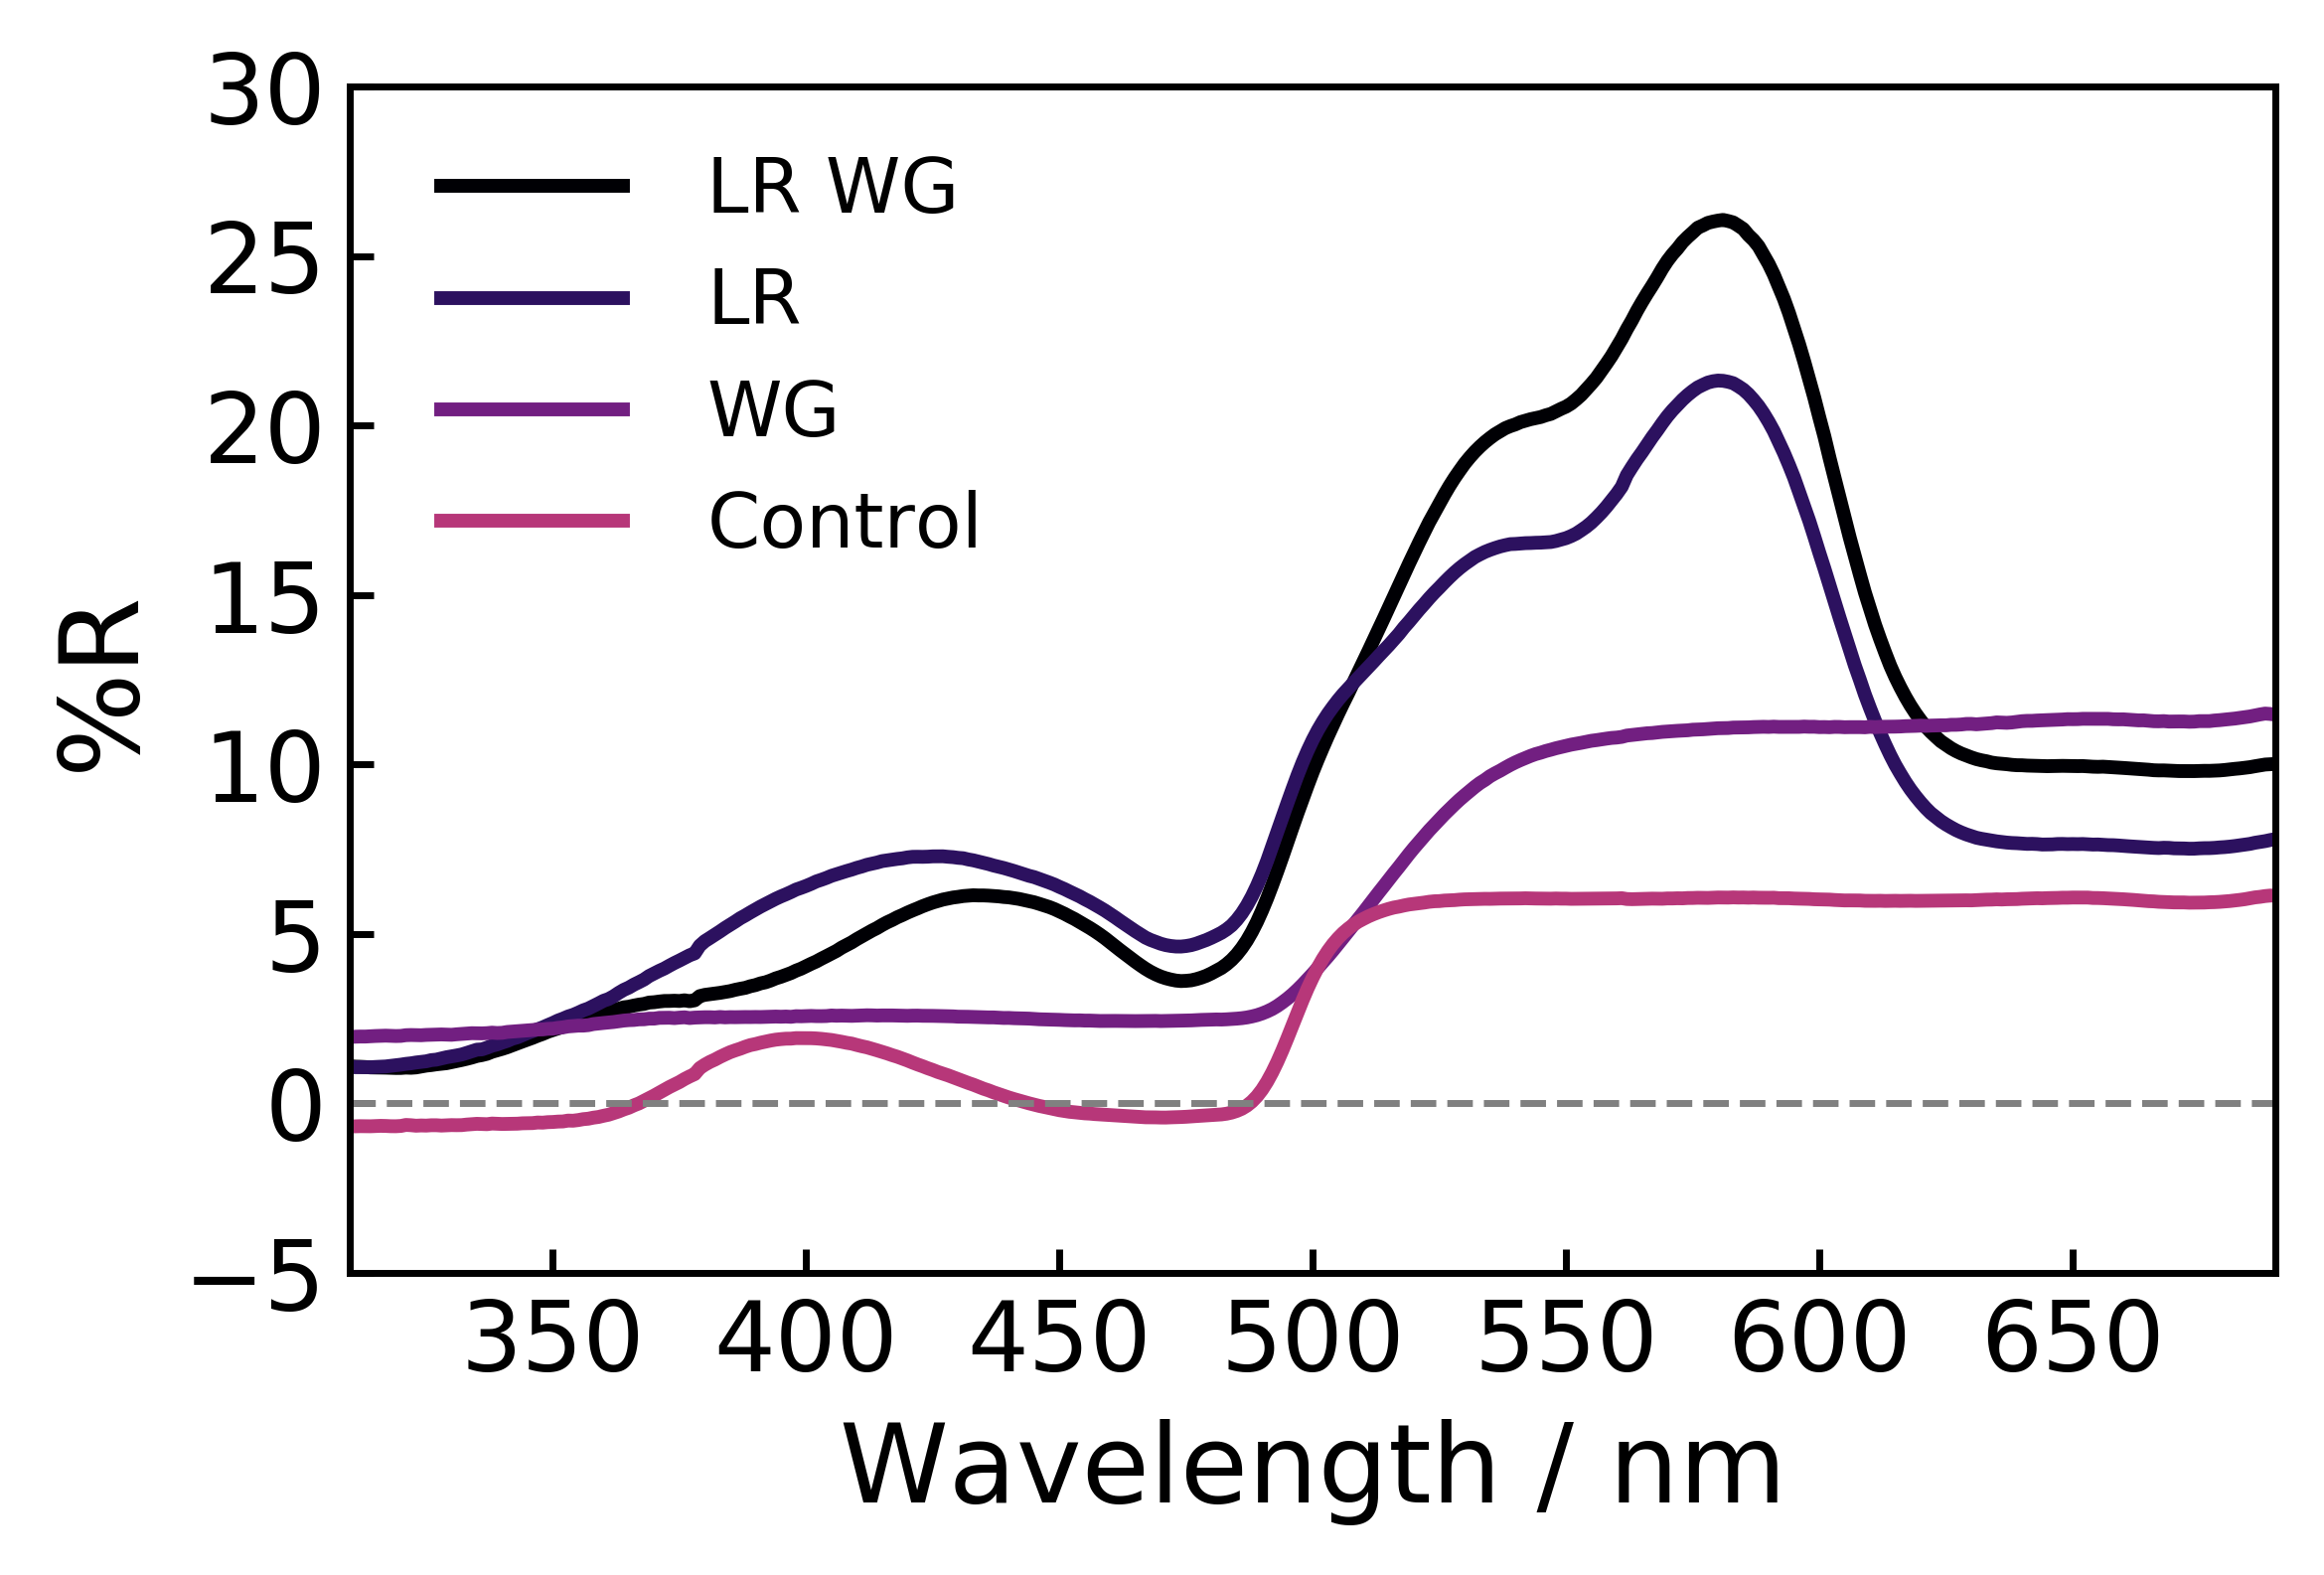

In [34]:
# cividis colour map used for plotting
evenly_spaced_interval = np.linspace(0, 1, len(sample_names.index))
colors = [cm.magma(x) for x in evenly_spaced_interval]

# plot uncalibrated reflectance
with rc_context(fname=rc_fname):
    plt.plot(data['S1_LR_WG'],label='LR WG',color=colors[0])
    plt.plot(data['S5_LR'],label='LR',color=colors[1])
    plt.plot(data['S4_WG'],label='WG',color=colors[2])
    plt.plot(data['S7_Control'],label='Control',color=colors[3])
    plt.axhline(0,ls='--',color='grey',lw=1)
    plt.xlim(310,690)
    plt.ylim(-5,30)
    plt.xlabel('Wavelength / nm')
    plt.ylabel('%R')
    plt.legend(fontsize=11)

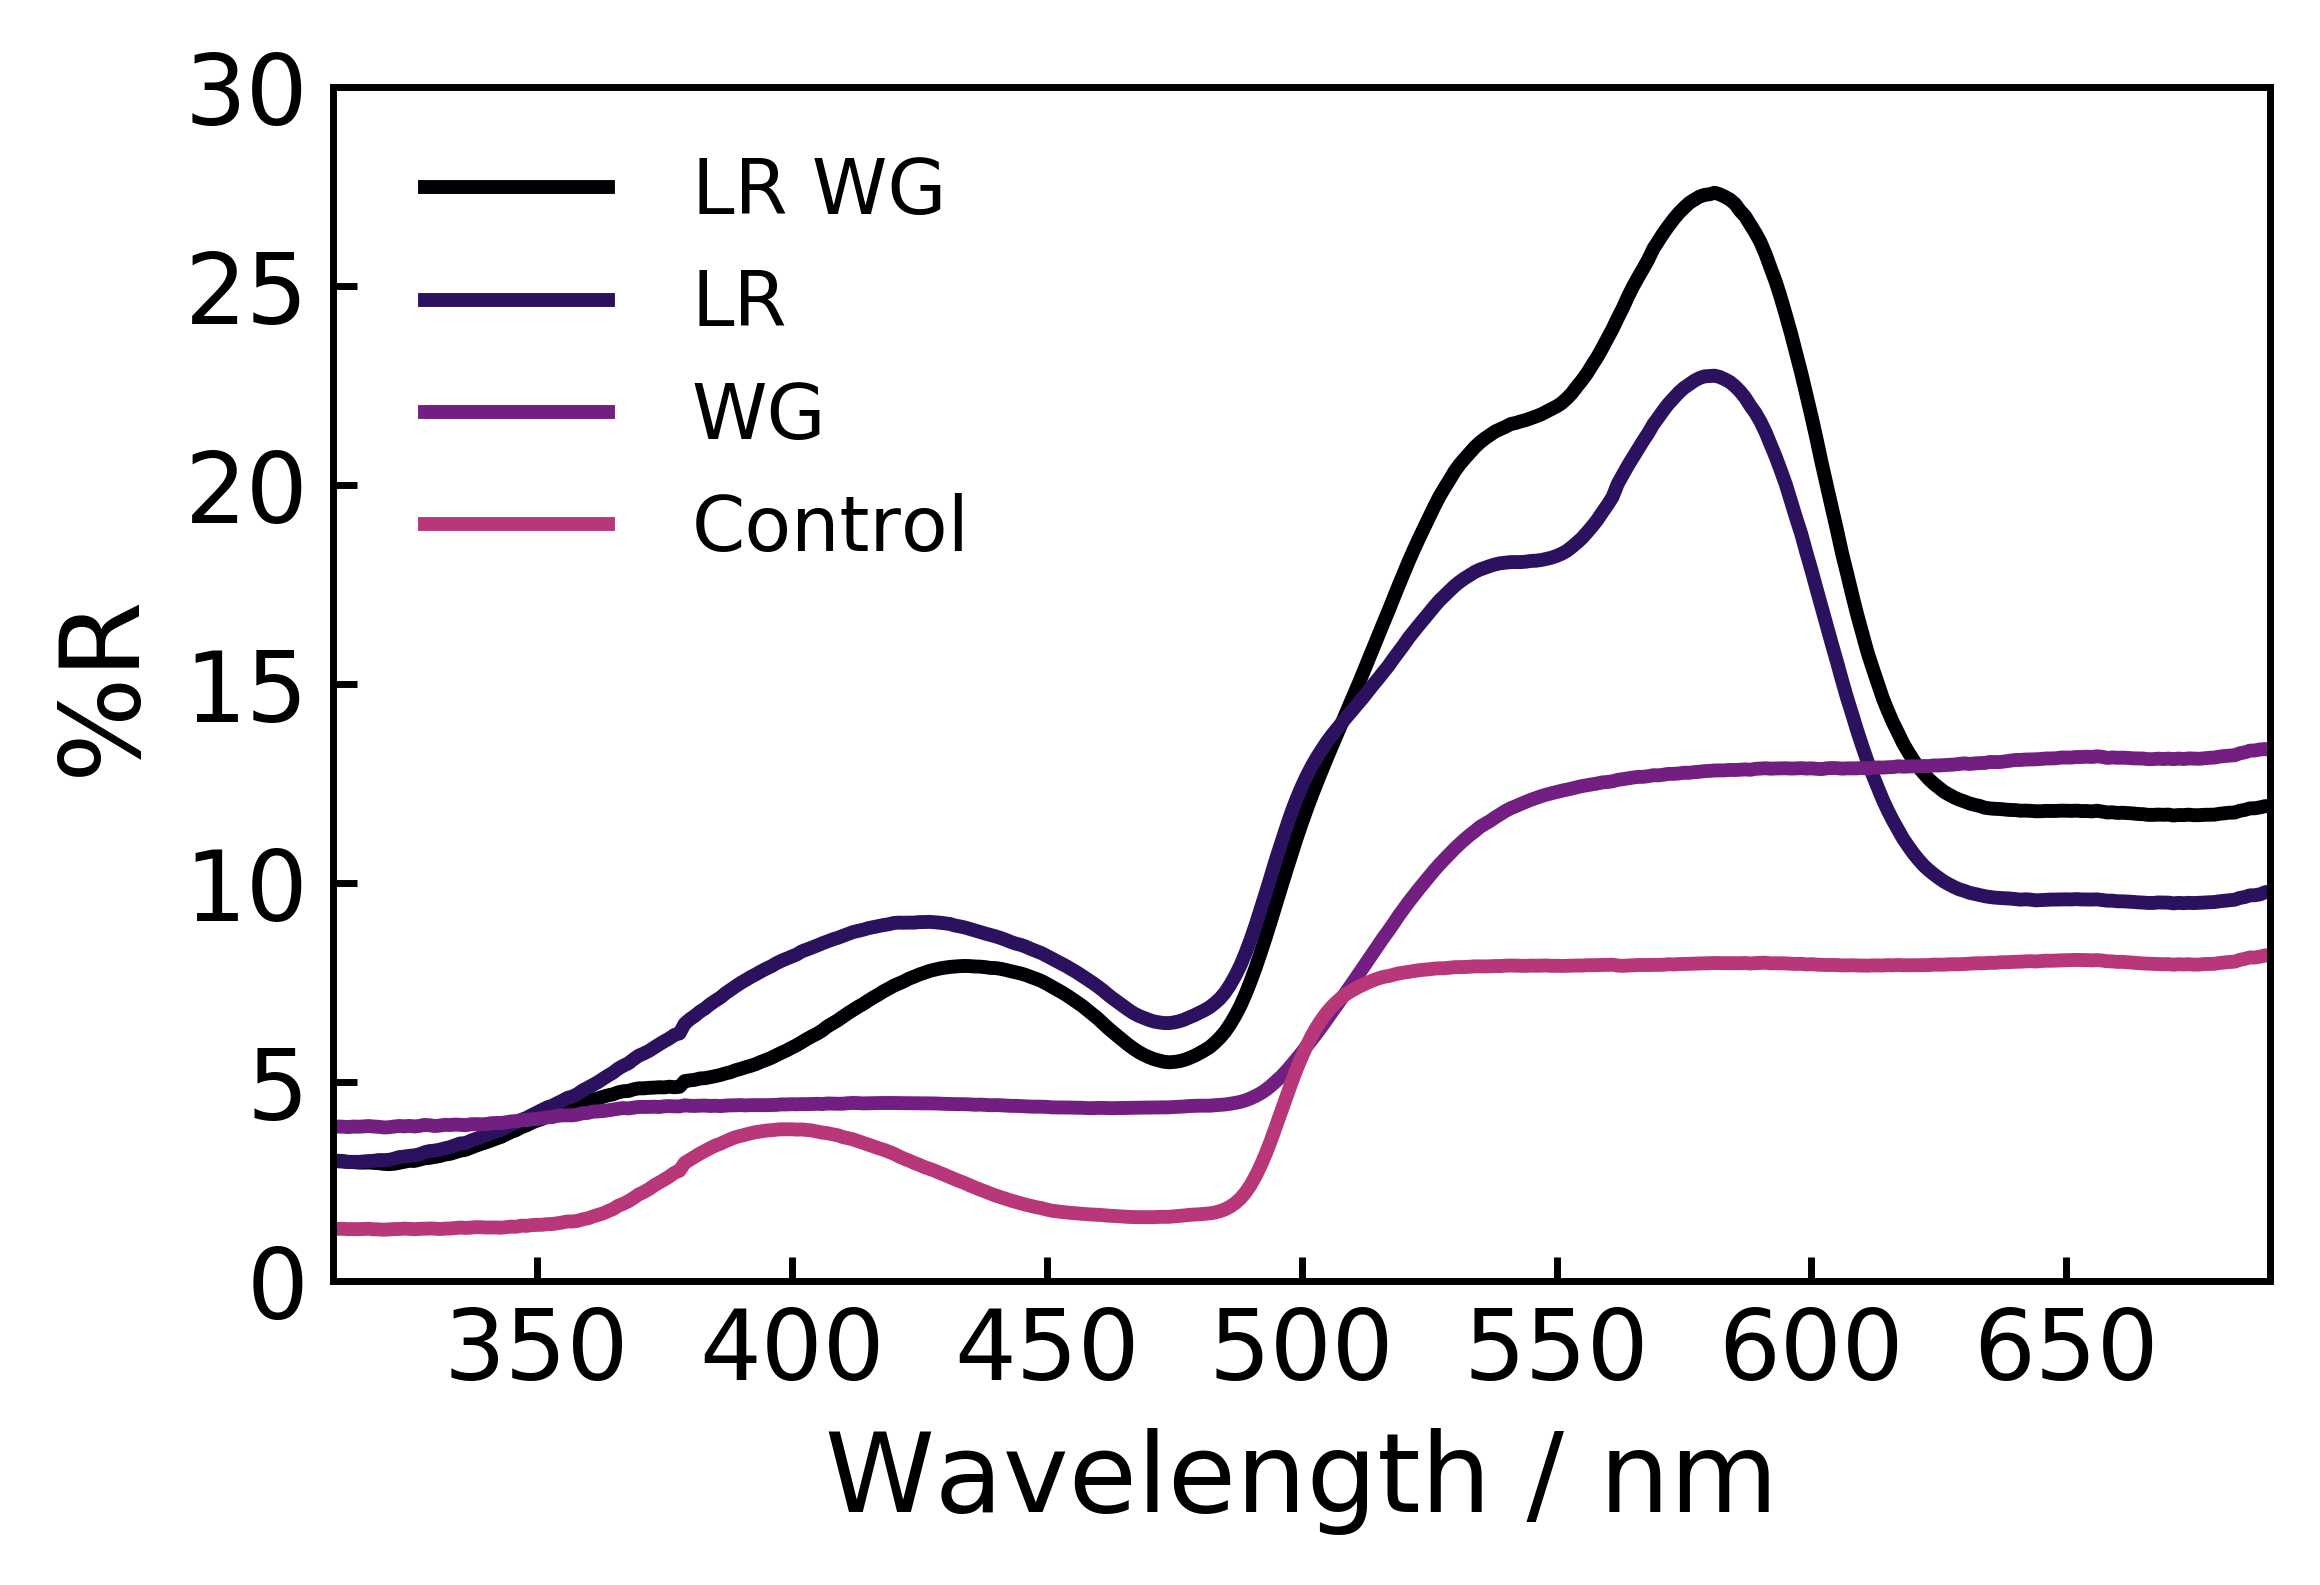

In [35]:
# plot calibrated reflectance
with rc_context(fname=rc_fname):
    plt.plot(data_processed['S1_LR_WG'],label='LR WG',color=colors[0])
    plt.plot(data_processed['S5_LR'],label='LR',color=colors[1])
    plt.plot(data_processed['S4_WG'],label='WG',color=colors[2])
    plt.plot(data_processed['S7_Control'],label='Control',color=colors[3])
    plt.xlim(310,690)
    plt.ylim(0,30)
    plt.xlabel('Wavelength / nm')
    plt.ylabel('%R')
    plt.legend(fontsize=11)